In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
    
plt.style.use('ggplot')
    
plt.rcParams['axes.unicode_minus'] = False

In [2]:
os.chdir('C:/Users/JAEMIN/Desktop/DeepLearning/TEAM_PROJECT/data')

In [3]:
oe = pd.read_csv('onion_element.csv')

In [4]:
oe

,year_local,area,year,10a당 생산량 (kg),평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,평균기온 5월,평균기온 6월,...,12월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,2.954839,5.782143,7.812903,11.500000,17.235484,22.016667,...,0.007,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,-0.677419,6.114286,7.200000,13.076667,17.290323,21.343333,...,0.006,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,2.832258,2.762069,8.274194,13.986667,18.929032,21.563333,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,2.538710,4.700000,10.203226,12.573333,18.154839,21.946667,...,0.007,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,4.958065,5.835714,9.822581,14.600000,18.709677,21.403333,...,0.006,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2013_제주도,제주도,2013,6681,4.477419,5.073214,7.793548,10.057983,13.664516,16.075833,...,0.003,0.08350,11.723000,11.165000,8.787500,3.269500,3.149500,0.016500,41.049500,0.070000
125,2014_제주도,제주도,2014,7220,5.483607,5.778182,8.078226,11.165546,13.962097,15.491667,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,0.068000
126,2015_제주도,제주도,2015,6552,5.813223,5.457143,7.720968,10.848333,13.516935,15.801667,...,0.002,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,0.084000
127,2016_제주도,제주도,2016,6458,4.473387,5.337931,7.605645,11.395833,13.438710,16.264167,...,0.003,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,0.078000


In [5]:
import scipy.stats
winsor = scipy.stats.mstats.winsorize

In [6]:
df_ws = pd.DataFrame()

for i in range(3, 193):
    a = pd.DataFrame(winsor(oe.iloc[:, i], limits = [0.01, 0.01]))
    df_ws = pd.concat([df_ws, a], axis = 1)
df_ws

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,7163,2.954839,5.782143,7.812903,11.500000,17.235484,22.016667,25.225806,27.877419,23.865556,...,0.007,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,-0.677419,6.114286,7.200000,13.076667,17.290323,21.343333,25.083871,25.783871,23.286667,...,0.006,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,2.832258,2.762069,8.274194,13.986667,18.929032,21.563333,25.525806,27.519355,22.160000,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,2.538710,4.700000,10.123333,12.573333,18.154839,21.946667,26.080645,27.961290,23.683333,...,0.007,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,4.958065,5.835714,9.822581,14.600000,18.709677,21.403333,24.767742,24.161290,22.656667,...,0.006,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,6681,4.477419,5.073214,7.793548,10.057983,13.664516,16.075833,20.651220,21.475000,18.195833,...,0.003,0.08350,11.723000,11.165000,8.787500,3.269500,3.149500,0.016500,41.049500,0.070000
125,7220,5.483607,5.778182,8.078226,11.165546,13.962097,15.801667,18.645161,18.799194,17.715000,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,0.068000
126,6552,5.813223,5.457143,7.720968,10.848333,13.516935,15.801667,18.489216,18.799194,15.954167,...,0.002,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,0.084000
127,6458,4.473387,5.337931,7.605645,11.395833,13.438710,16.264167,25.326804,27.969892,23.692222,...,0.003,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,0.078000


In [7]:
columns_list = oe.columns[3:]
columns_list

Index(['10a당 생산량 (kg)', '평균기온 1월', '평균기온 2월', '평균기온 3월', '평균기온 4월', '평균기온 5월',
       '평균기온 6월', '평균기온 7월', '평균기온 8월', '평균기온 9월',
       ...
       '12월 아황산가스', '6가크롬 Cr6+', '구리 Cu', '납 Pb', '니켈 Ni', '비소 As',
       '수소이온농도 pH', '수은 Hg', '아연 Zn', '카드뮴 Cd'],
      dtype='object', length=190)

In [8]:
df_ws.columns = columns_list

In [10]:
tag = oe.iloc[:, :3]
df_ws = pd.concat([tag, df_ws], axis = 1)

In [11]:
oe = df_ws
oe

,year_local,area,year,10a당 생산량 (kg),평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,평균기온 5월,평균기온 6월,...,12월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,2010_부산광역시,부산광역시,2010,7163,2.954839,5.782143,7.812903,11.500000,17.235484,22.016667,...,0.007,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,2011_부산광역시,부산광역시,2011,7393,-0.677419,6.114286,7.200000,13.076667,17.290323,21.343333,...,0.006,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,2012_부산광역시,부산광역시,2012,6303,2.832258,2.762069,8.274194,13.986667,18.929032,21.563333,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,2013_부산광역시,부산광역시,2013,8265,2.538710,4.700000,10.123333,12.573333,18.154839,21.946667,...,0.007,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,2014_부산광역시,부산광역시,2014,7271,4.958065,5.835714,9.822581,14.600000,18.709677,21.403333,...,0.006,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2013_제주도,제주도,2013,6681,4.477419,5.073214,7.793548,10.057983,13.664516,16.075833,...,0.003,0.08350,11.723000,11.165000,8.787500,3.269500,3.149500,0.016500,41.049500,0.070000
125,2014_제주도,제주도,2014,7220,5.483607,5.778182,8.078226,11.165546,13.962097,15.801667,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,0.068000
126,2015_제주도,제주도,2015,6552,5.813223,5.457143,7.720968,10.848333,13.516935,15.801667,...,0.002,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,0.084000
127,2016_제주도,제주도,2016,6458,4.473387,5.337931,7.605645,11.395833,13.438710,16.264167,...,0.003,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,0.078000


In [12]:
na = pd.DataFrame(oe.isna().sum())
na[na[0]>0]

,0


In [13]:
x_list = []
for i in range(4,193):
    x_list.append(oe.columns[i])

In [14]:
p_value = []
corr = []

In [15]:
from scipy import stats

In [16]:
for item in x_list:
    corr.append(stats.pearsonr(oe[item], oe['10a당 생산량 (kg)'])[0])
    p_value.append(stats.pearsonr(oe[item], oe['10a당 생산량 (kg)'])[1])

C:\Users\JAEMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [17]:
x_list = pd.DataFrame(x_list).rename(columns = {0 :'변수명'})
corr = pd.DataFrame(corr).rename(columns = {0 :'상관계수'})
p_value = pd.DataFrame(p_value).rename(columns = {0 : 'p-value'})
p_list = pd.concat([x_list, corr, p_value], axis = 1)

In [18]:
selected_var = p_list[p_list['p-value'] < 0.05]
selected_var.reset_index(inplace = True, drop = True)
selected_var

,변수명,상관계수,p-value
0,평균기온 1월,0.440655,1.730969e-07
1,평균기온 2월,0.524064,1.846542e-10
2,평균기온 3월,0.518428,3.113640e-10
3,평균기온 4월,0.342718,7.016329e-05
4,평균기온 9월,0.272087,1.812772e-03
...,...,...,...
94,니켈 Ni,0.366801,1.907068e-05
95,비소 As,0.319480,2.238310e-04
96,수소이온농도 pH,0.376241,1.111521e-05
97,수은 Hg,0.267860,2.147946e-03


In [19]:
tag = oe.iloc[:, : 3]

In [20]:
for i in range(len(selected_var)):
    name = selected_var['변수명'][i]
    var = oe[name]
    tag = pd.concat([tag, var], axis = 1)
tag = pd.concat([tag, oe['10a당 생산량 (kg)']], axis = 1)
tag

,year_local,area,year,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,평균기온 9월,평균기온 10월,평균기온 11월,...,12월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,10a당 생산량 (kg)
0,2010_부산광역시,부산광역시,2010,2.954839,5.782143,7.812903,11.500000,23.865556,18.245161,11.280000,...,0.007,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,7163
1,2011_부산광역시,부산광역시,2011,-0.677419,6.114286,7.200000,13.076667,23.286667,17.570968,13.606667,...,0.006,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,7393
2,2012_부산광역시,부산광역시,2012,2.832258,2.762069,8.274194,13.986667,22.160000,17.777419,10.106667,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,6303
3,2013_부산광역시,부산광역시,2013,2.538710,4.700000,10.123333,12.573333,23.683333,18.941935,10.900000,...,0.007,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,8265
4,2014_부산광역시,부산광역시,2014,4.958065,5.835714,9.822581,14.600000,22.656667,17.874194,12.676667,...,0.006,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,7271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2013_제주도,제주도,2013,4.477419,5.073214,7.793548,10.057983,18.195833,14.800000,10.260870,...,0.003,0.08350,11.723000,11.165000,8.787500,3.269500,3.149500,0.016500,41.049500,6681
125,2014_제주도,제주도,2014,5.483607,5.778182,8.078226,11.165546,17.715000,14.670732,10.738333,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,7220
126,2015_제주도,제주도,2015,5.813223,5.457143,7.720968,10.848333,15.954167,14.166129,11.287500,...,0.002,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,6552
127,2016_제주도,제주도,2016,4.473387,5.337931,7.605645,11.395833,23.692222,19.283871,13.033333,...,0.003,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,6458


In [21]:
tag.to_csv('selected_var.csv', index = False)

### Factor Analysis

In [22]:
df = pd.read_csv('selected_var.csv')

In [23]:
df_col = df.columns[3:].tolist()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range = (0,1))

In [26]:
sc_df = scaler.fit_transform(df.iloc[:, 3:])
sc_df = pd.DataFrame(sc_df, columns = df_col)

In [27]:
sc_df

,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,최고기온 1월,최고기온 2월,...,12월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,10a당 생산량 (kg)
0,0.779952,0.963188,0.688453,0.479121,1.000000,0.880271,0.764796,0.785423,0.834660,0.907826,...,0.714286,0.556842,0.163447,0.374061,0.242348,0.211434,0.000000,0.222406,0.030460,0.733774
1,0.500329,1.000000,0.605807,0.684434,0.928677,0.802558,1.000000,0.726993,0.575902,1.000000,...,0.571429,0.556842,0.036845,0.171663,0.123007,0.113668,0.011007,0.349495,0.118132,0.772750
2,0.770516,0.628463,0.750655,0.802934,0.789865,0.826355,0.646183,0.609883,0.811571,0.565231,...,0.571429,0.013351,0.224817,0.214159,0.105914,0.214290,0.091563,0.167329,0.054592,0.588036
3,0.747917,0.843250,1.000000,0.618890,0.977549,0.960586,0.726382,0.805571,0.792197,0.818695,...,0.714286,0.037283,0.201149,0.094748,0.132333,0.210109,0.035562,0.127089,0.110623,0.920522
4,0.934167,0.969125,0.959445,0.882802,0.851057,0.837510,0.905986,0.656979,1.000000,0.896956,...,0.571429,0.126282,0.000000,0.123962,0.236502,0.210109,0.060964,0.222406,0.136138,0.752076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.897165,0.884615,0.685844,0.291342,0.301454,0.483156,0.661772,0.861923,0.742038,0.588150,...,0.142857,0.126282,0.201149,0.123962,0.236502,0.210109,0.035562,0.222406,0.136138,0.652093
125,0.974625,0.962749,0.724230,0.435569,0.242212,0.468256,0.710039,0.812434,0.849940,0.663042,...,0.142857,0.193632,0.000000,0.096400,0.000000,0.078920,0.060964,0.031772,0.111104,0.743433
126,1.000000,0.927167,0.676057,0.394261,0.025267,0.410091,0.765554,0.958885,0.869872,0.636303,...,0.000000,0.103431,0.201278,0.117746,0.000000,0.090110,0.074003,0.556014,0.274783,0.630232
127,0.896855,0.913954,0.660506,0.465557,0.978644,1.000000,0.942041,1.000000,0.723593,0.620958,...,0.142857,0.098620,0.255046,0.055569,0.177063,0.056834,0.027603,0.000000,0.274783,0.614303


In [39]:
x, y = sc_df.iloc[:, 3:99], sc_df.iloc[:, 99]
y

0      0.733774
1      0.772750
2      0.588036
3      0.920522
4      0.752076
         ...   
124    0.652093
125    0.743433
126    0.630232
127    0.614303
128    0.696831
Name: 10a당 생산량 (kg), Length: 129, dtype: float64

In [40]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [41]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
kmo_model

0.7707061733213227

In [42]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(23172.991454012146, 0.0)

In [43]:
fa = FactorAnalyzer()

In [44]:
fa.analyze(x, 5, rotation = 'varimax')

In [45]:
factor_df = fa.loadings
a = factor_df.index.tolist()

In [46]:
factor_df

,Factor1,Factor2,Factor3,Factor4,Factor5
평균기온 4월,0.309560,0.142758,0.756394,0.186284,-0.230333
평균기온 9월,0.549666,0.430056,0.300862,0.122123,-0.065677
평균기온 10월,0.668096,0.074818,0.560704,-0.052124,0.056522
평균기온 11월,0.854454,-0.172836,-0.085913,0.099064,0.019455
평균기온 12월,0.736291,-0.405148,0.229563,0.009768,0.013584
...,...,...,...,...,...
니켈 Ni,-0.019464,-0.018006,0.163299,0.945067,0.028711
비소 As,0.012789,-0.007605,-0.025677,0.922519,0.052548
수소이온농도 pH,-0.014448,-0.047338,0.144898,0.943264,-0.027502
수은 Hg,0.037969,-0.009171,0.003834,0.694230,-0.074339


In [47]:
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,28.138679
1,13.279385
2,8.483128
3,6.900959
4,4.207740
...,...
91,0.001436
92,0.000845
93,0.000454
94,0.000374


In [48]:
ev1 = ev[ev['Original_Eigenvalues'] >= 1]

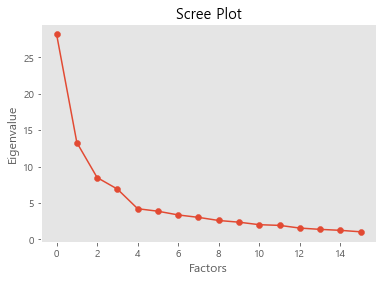

In [49]:
plt.scatter(range(0,len(ev1)),ev1)
plt.plot(range(0,len(ev1)),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [50]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,17.181772,19.003791,10.286810,7.286527,5.630172
Proportion Var,0.178977,0.197956,0.107154,0.075901,0.058648
Cumulative Var,0.178977,0.376933,0.484087,0.559989,0.618636


In [51]:
for item in factor_df.columns.tolist():
    print(item, ':', factor_df[factor_df[item]>=0.5].index.values)

Factor1 : ['평균기온 9월' '평균기온 10월' '평균기온 11월' '평균기온 12월' '최고기온 2월' '최고기온 11월'
 '최고기온 12월' '최저기온 1월' '최저기온 2월' '최저기온 3월' '최저기온 4월' '최저기온 5월' '최저기온 9월'
 '최저기온 10월' '최저기온 11월' '최저기온 12월' '운량 6월' '운량 9월' '운량 10월' '운량 11월'
 '순간최대풍속 1월' '순간최대풍속 7월' '순간최대풍속 9월' '순간최대풍속 10월']
Factor2 : ['10월 일산화탄소' '1월 이산화질소' '2월 이산화질소' '3월 이산화질소' '4월 이산화질소' '5월 이산화질소'
 '6월 이산화질소' '7월 이산화질소' '8월 이산화질소' '9월 이산화질소' '10월 이산화질소' '11월 이산화질소'
 '12월 이산화질소' '2월 아황산가스']
Factor3 : ['평균기온 4월' '평균기온 10월' '최고기온 1월' '최고기온 3월' '최고기온 4월' '최저기온 4월' '최저기온 10월'
 '강수량 10월' '일조시간 7월' '일조시간 8월' '5월 오존' '8월 오존']
Factor4 : ['6가크롬 Cr6+' '구리 Cu' '납 Pb' '니켈 Ni' '비소 As' '수소이온농도 pH' '수은 Hg' '아연 Zn']
Factor5 : ['순간최대풍속 1월' '순간최대풍속 12월' '1월 아황산가스' '2월 아황산가스' '3월 아황산가스' '11월 아황산가스'
 '12월 아황산가스']


In [52]:
fa.fit_factor_analysis(sc_df, 5)

,Factor1,Factor2,Factor3,Factor4,Factor5
평균기온 1월,-0.862994,-0.093156,-0.025328,-0.128538,0.183479
평균기온 2월,-0.809588,-0.260628,-0.135987,0.223658,-0.143052
평균기온 3월,-0.739414,-0.410275,0.335445,-0.111529,0.146410
평균기온 4월,-0.437281,-0.407479,0.570325,-0.302956,0.020971
평균기온 9월,-0.227991,-0.684832,0.204140,0.009277,-0.187824
...,...,...,...,...,...
비소 As,-0.072604,-0.005133,0.558789,0.708638,0.186508
수소이온농도 pH,-0.146259,0.019227,0.698209,0.599076,0.206767
수은 Hg,-0.073284,0.008830,0.481242,0.498249,0.041562
아연 Zn,-0.203012,0.032232,0.752377,0.489253,0.221507


In [53]:
from sklearn.decomposition import FactorAnalysis

In [54]:
transformer = FactorAnalysis(n_components=5, random_state=0)

In [55]:
X_transformed = transformer.fit_transform(x)

In [56]:
FAvar = pd.DataFrame(X_transformed).rename(columns = {0:'Factor1', 1:'Factor2', 2:'Factor3', 3:'Factor4', 4:'Factor5'})

In [57]:
FAvar = pd.concat([FAvar, y], axis = 1)
FAvar

,Factor1,Factor2,Factor3,Factor4,Factor5,10a당 생산량 (kg)
0,1.157959,-1.194564,0.903196,-0.444042,1.724676,0.733774
1,1.749196,-1.407049,1.301262,0.447747,0.605738,0.772750
2,0.927238,-1.028824,0.563114,-1.101350,1.418743,0.588036
3,1.164720,-1.176827,0.762806,-1.015256,1.791720,0.920522
4,1.676013,-1.185471,0.950143,-0.682427,1.033609,0.752076
...,...,...,...,...,...,...
124,1.400521,-0.842220,-1.980681,0.731788,0.358791,0.652093
125,1.599489,-1.059613,-2.073994,0.701837,-0.266939,0.743433
126,1.743920,-0.880938,-1.862384,0.918696,-0.467325,0.630232
127,2.357715,-1.164290,-1.106035,-0.274981,0.485122,0.614303


In [58]:
FAvar.to_csv('Selected_var(FA_corr).csv',encoding = 'CP949' ,index = False)

In [59]:
pd.read_csv('Selected_var(FA_corr).csv', encoding = 'CP949')

,Factor1,Factor2,Factor3,Factor4,Factor5,10a당 생산량 (kg)
0,1.157959,-1.194564,0.903196,-0.444042,1.724676,0.733774
1,1.749196,-1.407049,1.301262,0.447747,0.605738,0.772750
2,0.927238,-1.028824,0.563114,-1.101350,1.418743,0.588036
3,1.164720,-1.176827,0.762806,-1.015256,1.791720,0.920522
4,1.676013,-1.185471,0.950143,-0.682427,1.033609,0.752076
...,...,...,...,...,...,...
124,1.400521,-0.842220,-1.980681,0.731788,0.358791,0.652093
125,1.599489,-1.059613,-2.073994,0.701837,-0.266939,0.743433
126,1.743920,-0.880938,-1.862384,0.918696,-0.467325,0.630232
127,2.357715,-1.164290,-1.106035,-0.274981,0.485122,0.614303
